In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
df=pd.read_csv("../Pandas Dataset/Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


<Axes: >

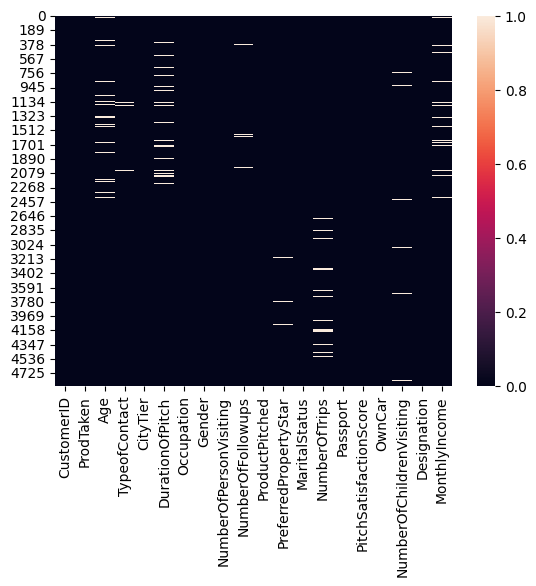

In [206]:
sns.heatmap(df.isnull())

In [207]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [208]:

df.drop("CustomerID",axis=1,inplace=True)

In [209]:
df["Occupation"].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [210]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [211]:
df["MaritalStatus"]=df["MaritalStatus"].replace("Unmarried","Single")

In [212]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married     2340
Single      1598
Divorced     950
Name: count, dtype: int64

In [213]:
df["Gender"].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [214]:
df["Gender"]=df['Gender'].replace("Fe Male","Female")

In [215]:
df["Gender"].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [216]:
null_feature_list=[i for i in df.columns if df[i].isnull().sum()>=1]
null_feature_list

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [217]:
df["Age"].fillna(df.Age.mean(),inplace=True)
df["TypeofContact"].fillna(df.TypeofContact.mode()[0],inplace=True)
df["DurationOfPitch"].fillna(df.DurationOfPitch.median(),inplace=True)
df["PreferredPropertyStar"].fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
df["NumberOfTrips"].fillna(df.NumberOfTrips.mode()[0],inplace=True)
df["NumberOfFollowups"].fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df["NumberOfChildrenVisiting"].fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df["MonthlyIncome"].fillna(df.MonthlyIncome.median(),inplace=True)

In [218]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [219]:
x=df.drop("ProdTaken",axis=1)
y=df["ProdTaken"]

In [220]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.7)

### 1. **One-Hot Encoding**

   **When to Use**: 
   - Use **One-Hot Encoding** when your categorical variable is **nominal**, meaning there is no ordinal (inherent) order among the categories. Examples of nominal data include colors (`Red`, `Blue`, `Green`), countries, and product types.
   - It’s beneficial for algorithms that might interpret the numerical ordering of categories as implying some sort of relationship, which does not exist in nominal data.

   **How It Works**:
   - One-Hot Encoding creates a new binary feature for each category level. If a category exists, its corresponding feature is marked as `1`; otherwise, it is marked as `0`.

   **Pros and Cons**:
   - **Pros**: Preserves all information without introducing false ordinal relationships.
   - **Cons**: Increases dimensionality, especially if the categorical variable has many unique levels.

   **Example**:
   ```python
   import pandas as pd
   from sklearn.preprocessing import OneHotEncoder
   
   # Sample data
   df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue']})
   
   # One-Hot Encoding
   encoder = OneHotEncoder(sparse=False)
   one_hot = encoder.fit_transform(df[['Color']])
   df_one_hot = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(['Color']))
   print(df_one_hot)
   ```
   Output:
   ```
   Color_Blue  Color_Green  Color_Red
   0          0.0          0.0        1.0
   1          1.0          0.0        0.0
   2          0.0          1.0        0.0
   3          1.0          0.0        0.0
   ```

---

### 2. **Label Encoding**

   **When to Use**:
   - Use **Label Encoding** when your categorical variable is **ordinal**, meaning there is a natural, meaningful order among the categories. Examples include education level (`High School < Bachelor < Master < PhD`) and survey responses (`Low < Medium < High`).
   - Label Encoding is often appropriate for algorithms that can interpret ordinal relationships, like **Tree-based models** (e.g., Decision Trees, Random Forests), which do not assume a linear relationship among values.

   **How It Works**:
   - Each category is assigned a unique integer. For instance, `Low` might be labeled as `0`, `Medium` as `1`, and `High` as `2`.

   **Pros and Cons**:
   - **Pros**: Simple and doesn’t increase the dimensionality of data.
   - **Cons**: Implies ordinal relationships that can mislead models sensitive to these values (e.g., linear models).

   **Example**:
   ```python
   import pandas as pd
   from sklearn.preprocessing import LabelEncoder
   
   # Sample data
   df = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Medium']})
   
   # Label Encoding
   encoder = LabelEncoder()
   df['Size_Label'] = encoder.fit_transform(df['Size'])
   print(df)
   ```
   Output:
   ```
      Size  Size_Label
   0  Small           2
   1  Medium          1
   2  Large           0
   3  Medium          1
   ```

---

### **Summary**

| Encoding Type    | When to Use                                | Example Categories                         | Use with Models |
|------------------|--------------------------------------------|--------------------------------------------|-----------------|
| **One-Hot**      | For **nominal** (unordered) categories     | Color, Country, Product Type               | Any model       |
| **Label Encoding** | For **ordinal** (ordered) categories       | Size (Small < Medium < Large), Education Level | Tree-based models |

In general:
- **One-Hot Encoding** works well for most machine learning models and is the safer choice if you’re unsure.
- **Label Encoding** is compact but best used with tree-based models and ordinal data.

# OneHotEncoder
OneHotEncoder is used to convert categorical variables into a format that can be provided to machine learning algorithms to do a better job in prediction. It creates a binary column for each category and returns a sparse matrix.
# StandardScaler
StandardScaler is used to standardize features by removing the mean and scaling to unit variance. This is important for algorithms that assume a normal distribution of the data or are sensitive to the scale of the data (e.g., SVM, KNN).
# ColumnTransformer 
ColumnTransformer is a powerful tool in scikit-learn that allows you to apply different preprocessing techniques to different columns within your dataset. This is particularly useful when you have a mix of numerical and categorical data and need to apply transformations like StandardScaler for numerical columns and OneHotEncoder for categorical columns.

In [221]:
numaric_features=x.select_dtypes(exclude="object").columns
numaric_features

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [222]:
catagorical_features=x.select_dtypes(include="object").columns
catagorical_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [223]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

from sklearn.compose import ColumnTransformer

numaric_transformer=StandardScaler()
catagorical_transformer=OneHotEncoder(drop="first")

transformer=ColumnTransformer(
    [
        ("OneHotEncoder",catagorical_transformer,catagorical_features),
        ("StandardScaler",numaric_transformer,numaric_features)
    ]
)

### If you'd like to apply `OneHotEncoder` and `StandardScaler` separately without using `ColumnTransformer`, you can do it as follows:

```python
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# Assuming `df` is your DataFrame and `categorical_features` and `numeric_features` are lists of column names
categorical_features = [...]  # List of categorical column names
numeric_features = [...]       # List of numeric column names

# Separate the features
categorical_data = df[categorical_features]
numeric_data = df[numeric_features]

# Apply OneHotEncoder to categorical features
onehot_encoder = OneHotEncoder(drop="first", sparse_output=False)
categorical_encoded = onehot_encoder.fit_transform(categorical_data)
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=onehot_encoder.get_feature_names_out(categorical_features))

# Apply StandardScaler to numeric features
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_data)
numeric_scaled_df = pd.DataFrame(numeric_scaled, columns=numeric_features)

# Concatenate the transformed columns back into a single DataFrame
df_transformed = pd.concat([categorical_encoded_df, numeric_scaled_df], axis=1)

# If you want to reassign to the original DataFrame `df`, you could do:
# df = pd.concat([categorical_encoded_df, numeric_scaled_df], axis=1)
```

### Explanation
1. **Separate Categorical and Numeric Data**: First, we split the original DataFrame `df` into `categorical_data` and `numeric_data`.
2. **OneHotEncoding**: We apply `OneHotEncoder` to `categorical_data` and convert the result into a DataFrame with the correct column names.
3. **StandardScaling**: We apply `StandardScaler` to `numeric_data` and similarly convert the result into a DataFrame.
4. **Concatenate Results**: Finally, we concatenate the transformed categorical and numeric DataFrames (`categorical_encoded_df` and `numeric_scaled_df`) along the columns to get a single transformed DataFrame.

This approach lets you apply the encodings manually without `ColumnTransformer`.

# fit_transform
on the training data during model development, as it both learns and applies the transformation.
# transform
 on the test data or new data that you want to make predictions on after the model has been trained.

In [224]:
x_train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
216,30.0,Company Invited,3,32.0,Small Business,Female,2,4.0,Deluxe,5.0,Single,6.0,0,2,0,1.0,Manager,21696.0
3590,35.0,Company Invited,1,17.0,Salaried,Male,3,2.0,Deluxe,3.0,Married,3.0,0,4,1,1.0,Manager,23402.0
4115,50.0,Company Invited,1,25.0,Salaried,Male,4,4.0,Deluxe,3.0,Married,3.0,1,1,0,1.0,Manager,25482.0
1345,35.0,Self Enquiry,1,13.0,Salaried,Female,2,4.0,Deluxe,4.0,Married,1.0,1,1,1,1.0,Manager,19788.0
2703,32.0,Company Invited,1,36.0,Small Business,Male,4,5.0,Basic,4.0,Single,2.0,0,3,1,3.0,Executive,22157.0


In [225]:
x_train_scaled=transformer.fit_transform(x_train)

In [226]:
x_train_scaled

array([[ 0.        ,  0.        ,  0.        , ..., -1.2884823 ,
        -0.22996977, -0.36209553],
       [ 0.        ,  0.        ,  1.        , ...,  0.7761069 ,
        -0.22996977, -0.04466603],
       [ 0.        ,  0.        ,  1.        , ..., -1.2884823 ,
        -0.22996977,  0.34235235],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.2884823 ,
        -0.22996977, -0.12355824],
       [ 1.        ,  0.        ,  0.        , ..., -1.2884823 ,
         0.94075431, -1.03919164],
       [ 1.        ,  0.        ,  1.        , ...,  0.7761069 ,
         0.94075431, -0.52490374]])

In [227]:
x_test_scaled=transformer.transform(x_test)
x_test_scaled

array([[ 1.        ,  0.        ,  0.        , ...,  0.7761069 ,
        -0.22996977, -0.70036448],
       [ 1.        ,  0.        ,  1.        , ...,  0.7761069 ,
        -0.22996977, -0.07536701],
       [ 0.        ,  0.        ,  1.        , ...,  0.7761069 ,
         0.94075431, -0.68529309],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -1.2884823 ,
        -1.40069385, -1.07547461],
       [ 1.        ,  0.        ,  0.        , ..., -1.2884823 ,
        -1.40069385, -0.95360103],
       [ 1.        ,  0.        ,  1.        , ..., -1.2884823 ,
        -1.40069385, -0.24096622]])

In [229]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()

model.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [230]:
y_predict=model.predict(x_test_scaled)

In [231]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_predict,y_test)

0.9222903885480572

In [232]:
confusion_matrix(y_predict,y_test)

array([[1194,  104],
       [  10,  159]], dtype=int64)